# Boolean networks compatible Incoherent Feed Forward Loop of type 3 network motif

In this notebook, we compute the Boolean networks which are compatible with both the interactions motifs of the I3-FFL, and behaviors observed in theoretical analysis of quantitative models, and experiment data from synthetically-designed circuits.

The analysis relies on the in-development tool BoNesis for network inference relying on Most Permissive Boolean Networks. The following cell installs it if necessary.

In [1]:
try:
    import bonesis
except:
    import os
    print("installing bonesis preview")
    os.system("pip install --no-cache --user bonesis-preview-20200701.zip")
    import importlib
    importlib.invalidate_caches()

installing bonesis preview


In [2]:
import bonesis

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

The network motif is as follows: node `a` (input) inhibits `c` (output); node `a` activates `b`; and `b` activates `c`. The signal acts on `a`.

The following cell defines the corresponding influence graph:

# computing graph layout...


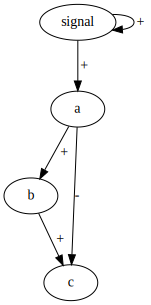

In [3]:
dom = bonesis.InfluenceGraph([
    ("signal", "signal", dict(sign=1, label="+")), # input node
    ("signal", "a", dict(sign=1, label="+")),
    ("a", "b", dict(sign=1, label="+")), 
    ("a","c", dict(sign=-1, label="-")),
    ("b","c", dict(sign=1, label="+"))])
dom

The observations are the following:

* with no signal, the system stays steady will all nodes inactive
* with signal, starting from all nodes being inactive, one can observe a transient activation of the output node, and eventually reach a steady state where input and intermediate nodes are active, and the output inactive

In [4]:
data = {
    "zero": {"signal": 0, "a": 0, "b": 0, "c": 0},
    "init": {"signal": 1, "a": 0, "b": 0, "c": 0},
    "trans": {"signal": 1, "c": 1},
    "end": {"signal": 1, "a": 1, "b": 1, "c": 0}
}

We instantiate BoNesis on the influence graph and configuration observations:

In [5]:
bo = bonesis.BoNesis(dom, data)

We impose that the `zero` observation is steady, i.e., is a fixed point:

In [6]:
bo.fixed(bo.obs("zero"));

We describe the dynamics observed from the signal activation:

In [7]:
~bo.obs("init") >= ~bo.obs("trans") >= bo.fixed(bo.obs("end"));

The following code enumarates *all* compatible MPBNs with the influence graph and observations.

In [8]:
for bn in bo.boolean_networks(quiet=True):
    print(bn)

a <- signal
b <- a
c <- !a&b
signal <- signal



Only one is found.